## 6_4.「カリフォルニア住宅価格」のデータセット


In [1]:
import pandas as pd

# 「カリフォルニア住宅価格」データセットをインポート
from sklearn.datasets import fetch_california_housing

# データセットをダウンロードし，ndarrayを要素としたdictオブジェクトに格納
housing = fetch_california_housing()

# データセットをデータフレームに読み込む
# dictオブジェクトhousingからdataキーを指定して８項目のデータを抽出
# dictオブジェクトhousingからfeature_namesを指定して列名を抽出
df_housing = pd.DataFrame(
    housing.data, columns = housing.feature_names
)

# データフレームを出力
df_housing


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [2]:
# 目的変数housing_targetを「Price」列としてデータフレームに追加
df_housing['Price'] = housing.target

# データフレームの冒頭5行を出力
df_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
# データの総数やデータ型，欠損値の数を確認
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [4]:
# 各列の基本統計量を計算
df_housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


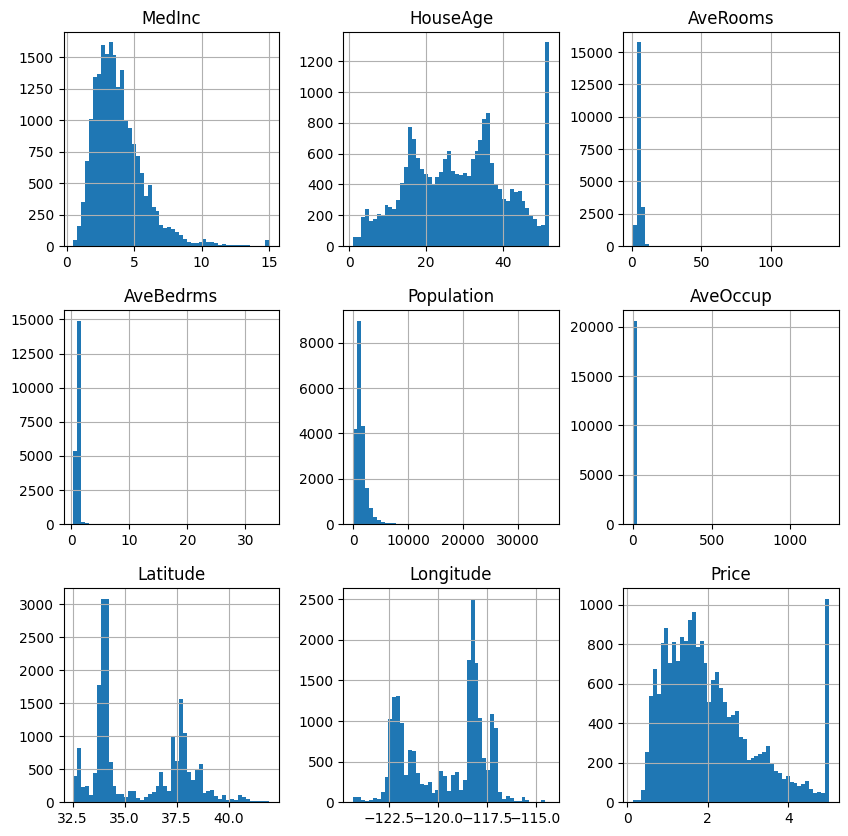

In [5]:
import matplotlib.pyplot as plt

# pandas.DataFrame.hist()で
# ビンの数を５０にして全体を10x10（インチ）でプロット
df_housing.hist(bins=50, figsize=(10, 10))
plt.show()

In [6]:
# ’Price'との相関係数を出力
df_housing.corr()['Price'].sort_values()

Latitude     -0.144160
AveBedrms    -0.046701
Longitude    -0.045967
Population   -0.024650
AveOccup     -0.023737
HouseAge      0.105623
AveRooms      0.151948
MedInc        0.688075
Price         1.000000
Name: Price, dtype: float64

count    20640.000000
mean      1425.476744
std       1132.462122
min          3.000000
25%        787.000000
50%       1166.000000
75%       1725.000000
max      35682.000000
Name: Population, dtype: float64


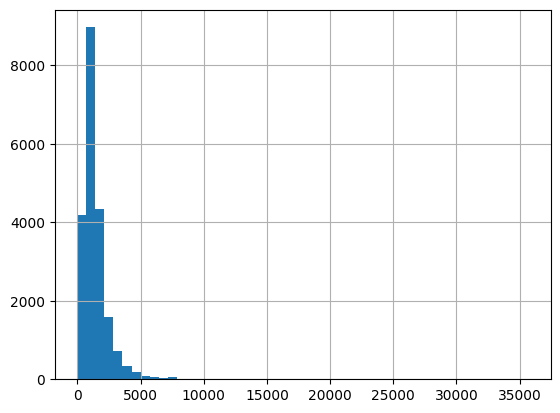

In [7]:
# Populationの基本統計量を出力
print(df_housing['Population'].describe())

# Populationのデータをヒストグラムにする
df_housing['Population'].hist(bins=50)
plt.show()

count    20640.000000
mean         3.050535
std          0.320737
min          0.477121
25%          2.895975
50%          3.066699
75%          3.236789
max          4.552449
Name: Population, dtype: float64


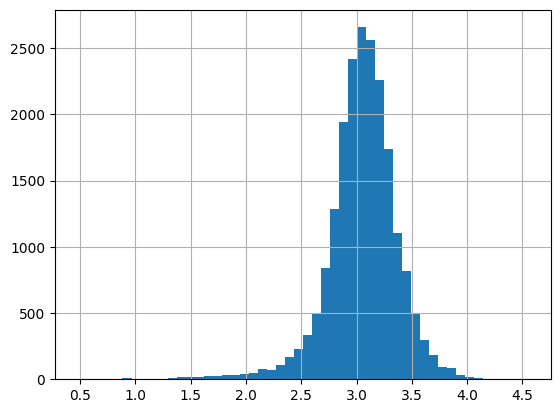

In [9]:
import numpy as np

# Populationのデータを大数変換(底10)
x_log = np.log10(df_housing['Population'])
# 対数変換後の基本統計量
print(x_log.describe())
# 対数変換後のヒストグラムを出力
x_log.hist(bins=50)
plt.show()